In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Cargar los archivos CSV de las cuatro tablas en DataFrames

In [5]:
# Leer las tablas
flights = pd.read_csv("../data/flights.csv")
seats = pd.read_csv("../data/seats.csv")
ticket_flights = pd.read_csv("../data/ticket_flights.csv")
tickets = pd.read_csv("../data/tickets.csv")

# Mostrar algunas filas de cada DataFrame para verificar
print(flights.head())
print(seats.head())
print(ticket_flights.head())
print(tickets.head())

   flight_id flight_no  scheduled_departure    scheduled_arrival  \
0       1185    PG0134  2017-09-10 09:50:00  2017-09-10 14:55:00   
1       3979    PG0052  2017-08-25 14:50:00  2017-08-25 17:35:00   
2       4739    PG0561  2017-09-05 12:30:00  2017-09-05 14:15:00   
3       5502    PG0529  2017-09-12 09:50:00  2017-09-12 11:20:00   
4       6938    PG0461  2017-09-04 12:25:00  2017-09-04 13:20:00   

  departure_airport arrival_airport     status aircraft_code  \
0               DME             BTK  Scheduled           319   
1               VKO             HMA  Scheduled           CR2   
2               VKO             AER  Scheduled           763   
3               SVO             UFA  Scheduled           763   
4               SVO             ULV  Scheduled           SU9   

      actual_departure       actual_arrival  
0  2017-09-10 09:50:00  2017-09-10 14:55:00  
1  2017-08-25 14:50:00  2017-08-25 17:35:00  
2  2017-09-05 12:30:00  2017-09-05 14:15:00  
3  2017-09-12 09:50:00

Análisis Descriptivo Inicial

In [6]:
# Descripción básica de las tablas
print(flights.describe())  # Información estadística sobre los vuelos
print(seats.describe())    # Información sobre los asientos
print(ticket_flights.describe())  # Información sobre los tickets por vuelo
print(tickets.describe())  # Información sobre los tickets

# Revisar valores nulos
print(flights.isnull().sum())  
print(seats.isnull().sum())    
print(ticket_flights.isnull().sum())  
print(tickets.isnull().sum())

          flight_id
count  33121.000000
mean   16561.000000
std     9561.353469
min        1.000000
25%     8281.000000
50%    16561.000000
75%    24841.000000
max    33121.000000
           seat_id
count  1339.000000
mean    670.000000
std     386.680316
min       1.000000
25%     335.500000
50%     670.000000
75%    1004.500000
max    1339.000000
          ticket_no     flight_id        amount  ticket_flights_id
count  1.045726e+06  1.045726e+06  1.045726e+06       1.045726e+06
mean   5.434081e+09  1.411006e+04  1.985891e+04       5.228635e+05
std    1.097935e+06  9.732944e+03  2.261239e+04       3.018752e+05
min    5.432001e+09  1.000000e+00  3.000000e+03       1.000000e+00
25%    5.433159e+09  5.501000e+03  7.200000e+03       2.614322e+05
50%    5.434082e+09  1.192600e+04  1.340000e+04       5.228635e+05
75%    5.435039e+09  2.303900e+04  2.310000e+04       7.842948e+05
max    5.436000e+09  3.312100e+04  2.033000e+05       1.045726e+06
          ticket_no
count  3.667330e+05
mean  

In [7]:
# Verificar si hay algún valor nulo en flights
if flights.isnull().values.any():
    print("Hay valores nulos en flights")
else:
    print("No hay valores nulos en flights")

# Verificar si hay algún valor nulo en seats
if seats.isnull().values.any():
    print("Hay valores nulos en seats")
else:
    print("No hay valores nulos en seats")

# Verificar si hay algún valor nulo en ticket_flights
if ticket_flights.isnull().values.any():
    print("Hay valores nulos en ticket_flights")
else:
    print("No hay valores nulos en ticket_flights")

# Verificar si hay algún valor nulo en tickets
if tickets.isnull().values.any():
    print("Hay valores nulos en tickets")
else:
    print("No hay valores nulos en tickets")

No hay valores nulos en flights
No hay valores nulos en seats
No hay valores nulos en ticket_flights
No hay valores nulos en tickets


 Evaluación de la Ocupación a lo Largo del Tiempo

Para analizar la ocupación en función del tiempo, es importante que las fechas estén en el formato datetime. Vamos a asegurarnos de que el campo date de los vuelos esté correctamente formateado y luego agrupamos los datos por fecha para identificar tendencias a lo largo del tiempo.

In [8]:
# Asegúrate de que las columnas de fecha sean de tipo datetime
flights['actual_departure'] = pd.to_datetime(flights['actual_departure'])

In [9]:
# Total de asientos por aeronave
total_seats = seats.groupby('aircraft_code').size().reset_index(name='total_seats')

# Contar tickets vendidos por vuelo
tickets_sold = ticket_flights.groupby('flight_id').size().reset_index(name='tickets_sold')

# Combinar información de vuelos
flights_info = flights[['flight_id', 'aircraft_code', 'actual_departure']]
combined = tickets_sold.merge(flights_info, on='flight_id').merge(total_seats, on='aircraft_code')

# Calcular la tasa de ocupación
combined['occupancy_rate'] = combined['tickets_sold'] / combined['total_seats'] * 100

In [10]:
# Agrupar por fecha y calcular la ocupación promedio
occupancy_by_date = combined.groupby(combined['actual_departure'].dt.date).agg({'occupancy_rate': 'mean'}).reset_index()
occupancy_by_date.columns = ['flight_date', 'average_occupancy_rate']

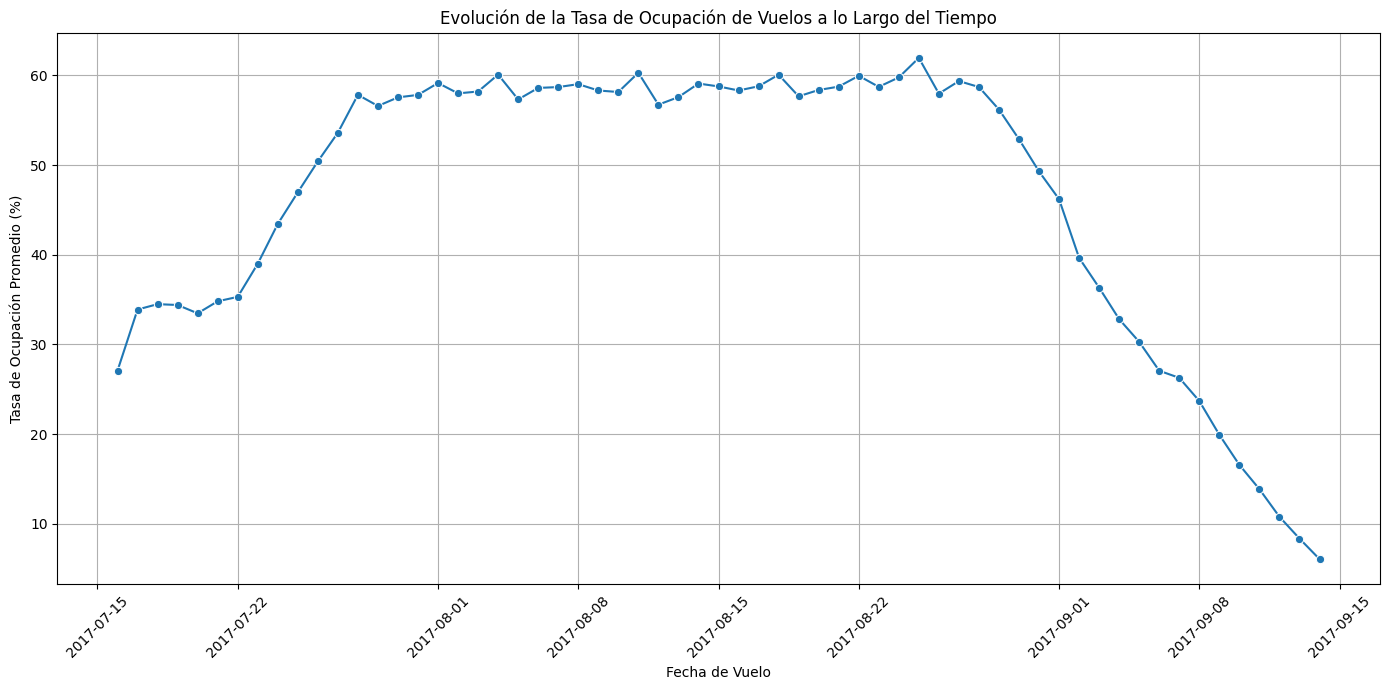

In [11]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=occupancy_by_date, x='flight_date', y='average_occupancy_rate', marker='o')
plt.title('Evolución de la Tasa de Ocupación de Vuelos a lo Largo del Tiempo')
plt.xlabel('Fecha de Vuelo')
plt.ylabel('Tasa de Ocupación Promedio (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

En este grafico, se puede observar que la tasa de ocupacion de vuelos fue creciendo exponencialmente desde el mes de julio hasta fines de julio aproximadamente, para luego transformarse en meseta con alguos picos pequeños de crecimiento entre fines de julio hasta finales de agosto para luego observarse un descenso hasta mediados de septiembre.


Distribución de la Tasa de Ocupación

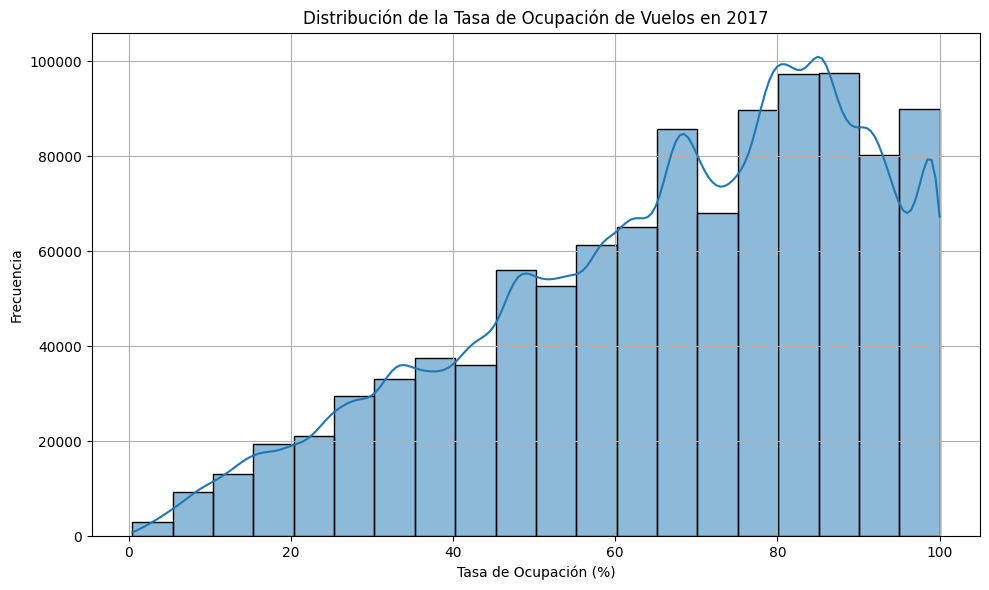

In [12]:
# Asegurarnos de que la columna 'actual_departure' esté en formato de fecha
flights['actual_departure'] = pd.to_datetime(flights['actual_departure'])

# Unir las tablas necesarias para obtener la tasa de ocupación y la fecha de salida del vuelo
combined = pd.merge(ticket_flights, flights[['flight_id', 'aircraft_code', 'actual_departure']], on='flight_id', how='left')

# Calcular el total de asientos disponibles por aeronave
total_seats = seats.groupby('aircraft_code').size().reset_index(name='total_seats')

# Contar tickets vendidos por vuelo
tickets_sold = ticket_flights.groupby('flight_id').size().reset_index(name='tickets_sold')

# Combinar toda la información para calcular la tasa de ocupación
combined = pd.merge(combined, total_seats, on='aircraft_code', how='left')
combined = pd.merge(combined, tickets_sold, on='flight_id', how='left')

# Calcular la tasa de ocupación
combined['occupancy_rate'] = (combined['tickets_sold'] / combined['total_seats']) * 100

# Extraer el año de la fecha de salida
combined['year'] = combined['actual_departure'].dt.year

# Obtener los años únicos presentes en los datos
years = combined['year'].unique()

# Crear un histograma de la tasa de ocupación por año
for year in years:
    plt.figure(figsize=(10, 6))
    
    # Filtrar los datos para el año correspondiente
    data_year = combined[combined['year'] == year]
    
    # Crear el histograma
    sns.histplot(data_year['occupancy_rate'], bins=20, kde=True)
    
    # Configuración del gráfico
    plt.title(f'Distribución de la Tasa de Ocupación de Vuelos en {year}')
    plt.xlabel('Tasa de Ocupación (%)')
    plt.ylabel('Frecuencia')
    plt.grid()
    plt.tight_layout()
    plt.show()

Este grafico muestra la distribución de la tasa de ocupación de vuelos a lo largo del año 2017. Se observa una distribucion exponencial la tasa de ocupacion de vuelos para luego descender.

Tasa de Ocupación por Aeronave:

Permitirá ver la variabilidad y la presencia de outliers en la tasa de ocupación por cada tipo de aeronave.

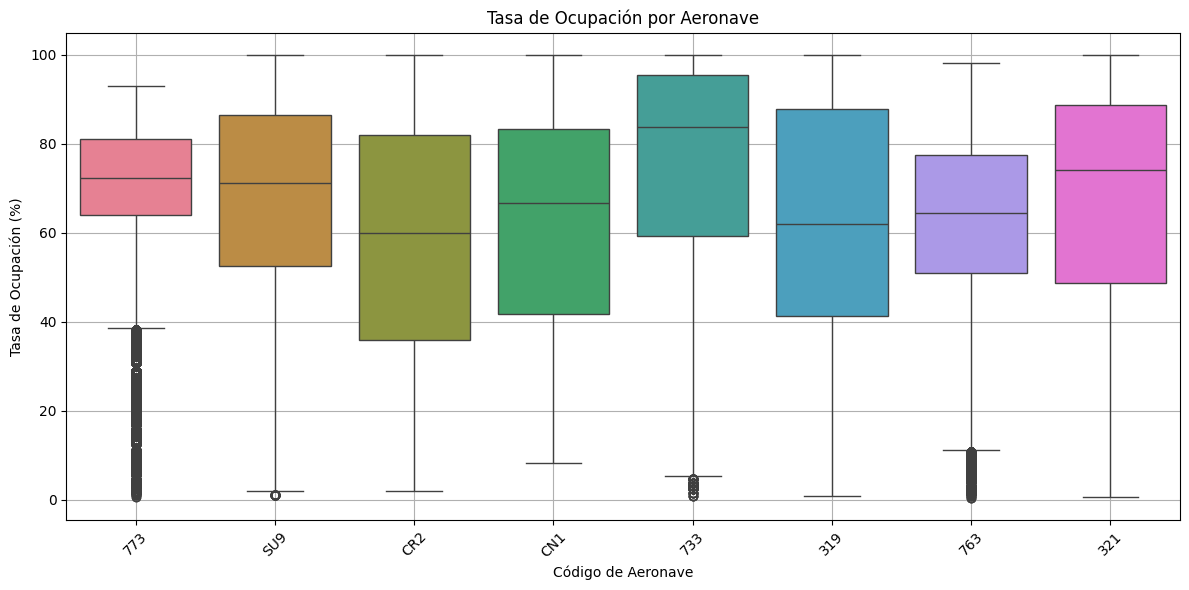

In [13]:
# Gráfico de caja de la tasa de ocupación por aeronave con colores distintos
plt.figure(figsize=(12, 6))

# Crear una paleta de colores con un color distinto para cada aeronave
unique_aircrafts = combined['aircraft_code'].unique()
palette = sns.color_palette("husl", len(unique_aircrafts))  # Cambia "husl" por otra paleta si lo deseas

# Usar 'hue' para asignar colores
sns.boxplot(data=combined, x='aircraft_code', y='occupancy_rate', hue='aircraft_code', palette=palette, legend=False)

plt.title('Tasa de Ocupación por Aeronave')
plt.xlabel('Código de Aeronave')
plt.ylabel('Tasa de Ocupación (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

Los aviones 773 y 763 muestran una alta tasa de ocupación, con medianas cercanas al tercer cuartil, lo que indica una eficiente utilización de capacidad. En contraste, los aviones 321, CR2 y CN1 presentan medianas bajas, lo que sugiere menor ocupación y posibles ineficiencias. Aviones como el 319, CR2, CN1 y 763 tienen vuelos con ocupaciones muy altas (sesgo positivo), mientras que los aviones 773, 733 y SU9 presentan vuelos con ocupaciones bajas (sesgo negativo), lo que indica oportunidades para ajustar rutas y frecuencias.

Histograma: Distribución de la Tasa de Ocupación

Ayudará a ver cómo se distribuyen las tasas de ocupación de los vuelos. Puedes hacerlo usando la tasa de ocupación que calculaste anteriormente.

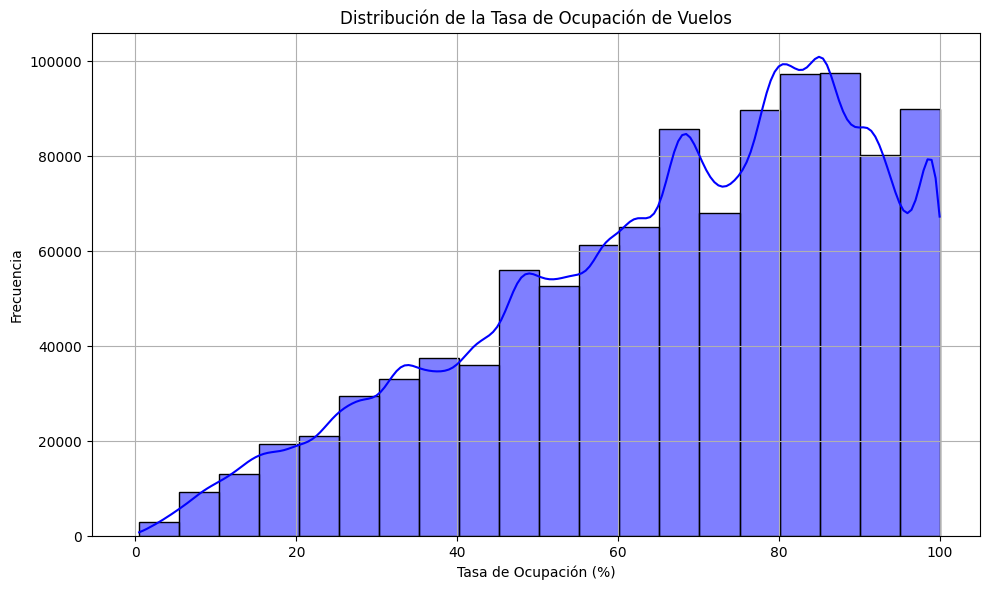

In [14]:
# Histograma con KDE
plt.figure(figsize=(10, 6))
sns.histplot(combined['occupancy_rate'], bins=20, kde=True, color='blue', alpha=0.5)

# Personalizar las barras de colores
for i in range(20):
    plt.bar(np.arange(0, 100, 5)[i], 1, color=sns.color_palette("husl", 20)[i], alpha=0.7)

# Títulos y etiquetas
plt.title('Distribución de la Tasa de Ocupación de Vuelos')
plt.xlabel('Tasa de Ocupación (%)')
plt.ylabel('Frecuencia')
plt.grid()
plt.tight_layout()
plt.show()


En este grafico, se puede observar que la distribucion de la tasa de ocupacion fue ligeramnete normal. La tasa de ocupación tiene más vuelos con tasas de ocupación en torno a un valor medio, mientras que los valores extremadamente bajos o extremadamente altos son menos comunes. Esto puede sugerir una baja eficiencia operativa o infrautilización de la capacidad de los aviones. Las aerolíneas podrían no estar llenando suficientes asientos en esos vuelos, lo que puede afectar la rentabilidad.

 Gráfico de Dispersión: Representaremos la tasa de ocupación en función de los vuelos. Visualizar la Ocupación: Ver cómo varía la tasa de ocupación de los vuelos según el total de asientos disponibles. Se puede ver si ciertas aeronaves tienen una tasa de ocupación consistentemente alta o baja, lo que podría informarte sobre la demanda de ciertos vuelos.

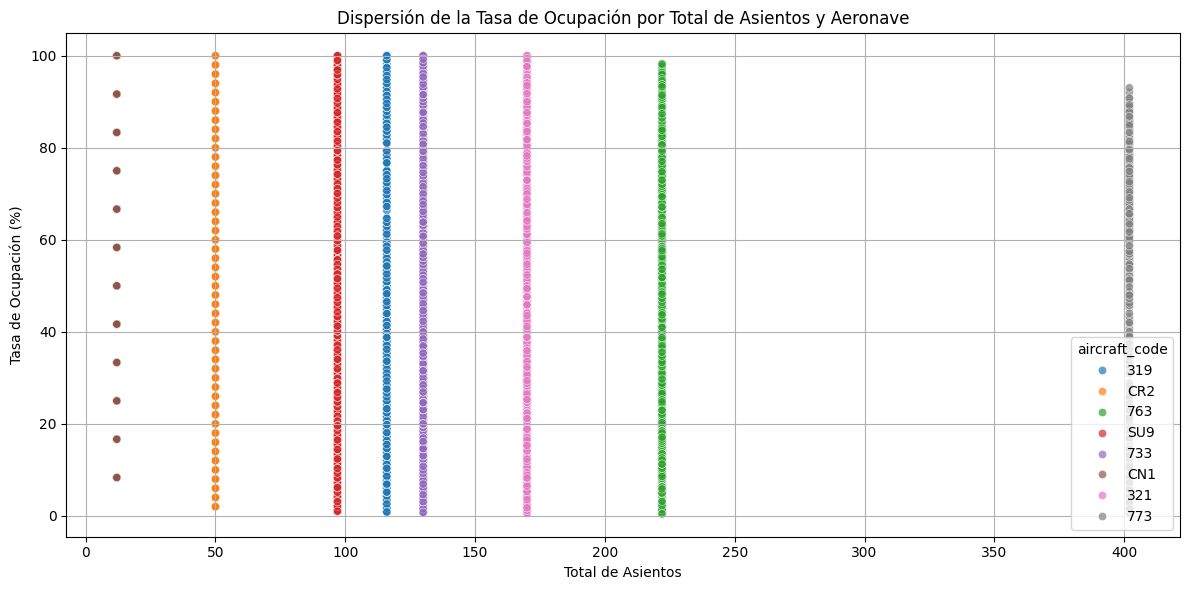

In [15]:
# Paso 1: Calcular el total de asientos por aeronave
total_seats = seats.groupby('aircraft_code').size().reset_index(name='total_seats')

# Paso 2: Contar los tickets vendidos por vuelo
tickets_sold = ticket_flights.groupby('flight_id').size().reset_index(name='tickets_sold')

# Paso 3: Combinar información de vuelos con asientos y tickets
flights_info = flights[['flight_id', 'aircraft_code', 'actual_departure']]
combined = flights_info.merge(total_seats, on='aircraft_code', how='left').merge(tickets_sold, on='flight_id', how='left')

# Paso 4: Calcular la tasa de ocupación
combined['occupancy_rate'] = (combined['tickets_sold'] / combined['total_seats']) * 100

# Paso 5: Crear gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(data=combined, x='total_seats', y='occupancy_rate', hue='aircraft_code', alpha=0.7)

# Paso 6: Personalizar el gráfico
plt.title('Dispersión de la Tasa de Ocupación por Total de Asientos y Aeronave')
plt.xlabel('Total de Asientos')
plt.ylabel('Tasa de Ocupación (%)')
plt.grid()
plt.tight_layout()
plt.show()

En este grafico, se puede observar que el avion CN1 fue el que menos demanda de vuelos tubo en comparacion a los demas, seguido del avion CR2. 

 Tasa de ocupación promedio para cada mes: representado en un mapa de calor. Este gráfico mostrará la tasa de ocupación promedio para cada mes en el eje y y los diferentes valores de ocupación en el eje x.

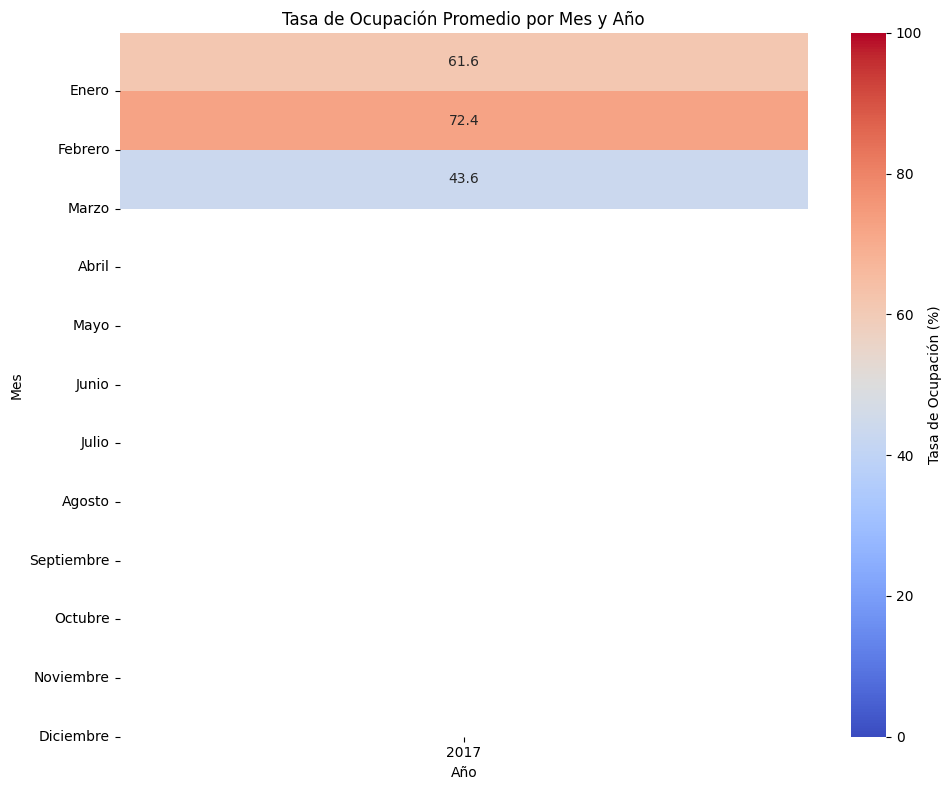

In [16]:
# Asegurarnos de que la columna 'actual_departure' esté en formato de fecha
flights['actual_departure'] = pd.to_datetime(flights['actual_departure'])

# Unir las tablas necesarias para obtener la tasa de ocupación y la fecha de salida del vuelo
combined = pd.merge(ticket_flights, flights[['flight_id', 'aircraft_code', 'actual_departure']], on='flight_id', how='left')

# Calcular el total de asientos disponibles por aeronave
total_seats = seats.groupby('aircraft_code').size().reset_index(name='total_seats')

# Contar tickets vendidos por vuelo
tickets_sold = ticket_flights.groupby('flight_id').size().reset_index(name='tickets_sold')

# Combinar toda la información para calcular la tasa de ocupación
combined = pd.merge(combined, total_seats, on='aircraft_code', how='left')
combined = pd.merge(combined, tickets_sold, on='flight_id', how='left')

# Calcular la tasa de ocupación
combined['occupancy_rate'] = (combined['tickets_sold'] / combined['total_seats']) * 100

# Extraer el mes y año de la fecha de salida
combined['year'] = combined['actual_departure'].dt.year
combined['month'] = combined['actual_departure'].dt.month

# Crear una tabla pivote con el promedio de la tasa de ocupación por mes y año
occupancy_by_month = combined.pivot_table(values='occupancy_rate', index='month', columns='year', aggfunc='mean')

# Reemplazar valores NaN por 0 o el valor que prefieras
occupancy_by_month = occupancy_by_month.fillna(0)

# Crear el heatmap con una paleta de colores
plt.figure(figsize=(10, 8))
sns.heatmap(occupancy_by_month, annot=True, cmap='coolwarm', fmt='.1f', cbar_kws={'label': 'Tasa de Ocupación (%)'}, vmin=0, vmax=100)

# Configuración del gráfico
plt.title('Tasa de Ocupación Promedio por Mes y Año')
plt.xlabel('Año')
plt.ylabel('Mes')
plt.yticks(ticks=range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=0)
plt.tight_layout()
plt.show()

Este gráfico es útil para analizar la eficiencia operativa (meses con vuelos más llenos) y la rentabilidad (meses con ocupaciones más bajas pueden indicar sobrecapacidad o poca demanda). Con respecto a la eficiencia operativa, los meses que mas vuelos ocupados fueron enero y febrero. En cambio, para rentabilidad, el mes de marzo fue el mez donde hubo poca demanda de vuelos.